In [1]:
import pandas as pd
df = pd.read_csv('diabetic_data.csv')


In [2]:
df.shape



(101766, 50)

In [3]:
# Replaces "?" with null values in the dataframe 
df.replace("?",pd.NA,inplace=True)

In [4]:
# Here the issue is that actual dataframe contain the a value named 'None' which is string but I think jupyter is considering it as null value and hence we are getting null values

# Deleting all the forward and backward spaces if present
df['max_glu_serum'] = df['max_glu_serum'].str.strip()

# So we replaced Null values with string named 'None'
df['max_glu_serum'] = df['max_glu_serum'].fillna('None')

In [5]:
# Applying the same thing to column named 'AC1result' which contains the same issue in the dataframe

# Deleting all the forward and backward spaces if present
df['A1Cresult'] = df['A1Cresult'].str.strip()

# So we replaced Null values with string named 'None'
df['A1Cresult'] = df['A1Cresult'].fillna('None')

In [6]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [7]:
# Drop columns with more than 90% missing values
columns_to_drop = missing_percentage[missing_percentage > 90].index
df.drop(columns=columns_to_drop,inplace=True)

In [8]:
df.shape


(101766, 49)

In [9]:
import numpy as np
df_num = df.select_dtypes(np.number)

In [10]:
variance = df_num.var()
print(variance)

encounter_id                1.053503e+16
patient_nbr                 1.497408e+15
admission_type_id           2.089189e+00
discharge_disposition_id    2.788015e+01
admission_source_id         1.651675e+01
time_in_hospital            8.910868e+00
num_lab_procedures          3.870805e+02
num_procedures              2.909777e+00
num_medications             6.605733e+01
number_outpatient           1.605961e+00
number_emergency            8.657786e-01
number_inpatient            1.594824e+00
number_diagnoses            3.738810e+00
dtype: float64


In [11]:
df2 = ['examide','citoglipton','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','tolbutamide','acarbose','miglitol',
       'troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone', 
       'metformin-rosiglitazone','metformin-pioglitazone']

In [12]:
def check_zero_variance(df, column_name):
    unique_values = df[column_name].nunique()
    if unique_values <= 2:
        return column_name

# List to store zero variance columns
zero_variance_columns = []

# Check for each categorical column
for column in df2:
    result = check_zero_variance(df, column)
    if result:
        zero_variance_columns.append(result)

print("Zero Variance Columns:")
print(zero_variance_columns)

Zero Variance Columns:
['examide', 'citoglipton', 'acetohexamide', 'tolbutamide', 'troglitazone', 'examide', 'citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [13]:
df.drop(columns=zero_variance_columns, inplace=True)

In [14]:
df.shape

(101766, 40)

In [15]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

In [16]:
df['race'].ffill(inplace=True)
df['payer_code'].ffill(inplace=True)
df['medical_specialty'].ffill(inplace=True)
df['diag_3'].ffill(inplace=True)
df['diag_1'].ffill(inplace=True)
df['diag_2'].ffill(inplace=True)

C:\Users\Vivek\AppData\Local\Temp\ipykernel_13268\3046111714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].ffill(inplace=True)
C:\Users\Vivek\AppData\Local\Temp\ipykernel_13268\3046111714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [17]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  20.091190
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000983
diag_3                       0.000983
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(81320, 40)

In [20]:
# Replacing ‘<30’ with a 1 and ‘>30’ and ‘NO’ to 0 respectively
df["readmitted"] = df["readmitted"].replace({'<30': 1, '>30': 0, 'NO': 0})

C:\Users\Vivek\AppData\Local\Temp\ipykernel_13268\720286912.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["readmitted"] = df["readmitted"].replace({'<30': 1, '>30': 0, 'NO': 0})


In [21]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import seaborn as sns

In [22]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [23]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['readmitted'])
y = df['readmitted']

In [24]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Pipeline for preprocessing and modeling
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

In [26]:
# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

In [27]:
# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

precision:
0.8406154354391767
recall:
0.8896950319724545
f1
0.8416778245748018
roc_auc
0.6490835511483289
Confusion Matrix:
[[14441    39]
 [ 1755    29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     14480
           1       0.43      0.02      0.03      1784

    accuracy                           0.89     16264
   macro avg       0.66      0.51      0.49     16264
weighted avg       0.84      0.89      0.84     16264



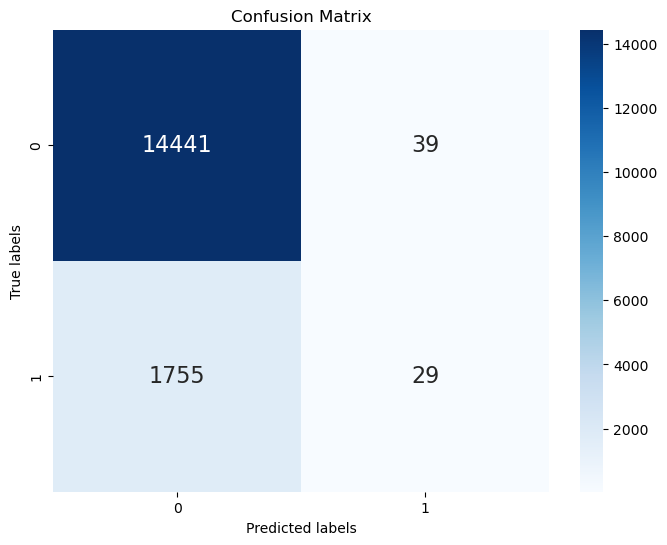

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming clf is your classifier model trained earlier

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1], average='weighted', multi_class='ovr')

print('precision:')
print(precision)

print('recall:')
print(recall)

print('f1')
print(f1)

print('roc_auc')
print(roc_auc)

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(clf_report)


# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from sklearn.cluster import KMeans

# Using K-Means algorithm to cluster the cleansed dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [30]:
# Compare the obtained clusters with the distribution found in the data
df['cluster'] = kmeans.labels_
cluster_counts = df['cluster'].value_counts(normalize=True).sort_index()
print("Cluster distribution:")
print(cluster_counts)

Cluster distribution:
cluster
0    0.312236
1    0.130866
2    0.556899
Name: proportion, dtype: float64


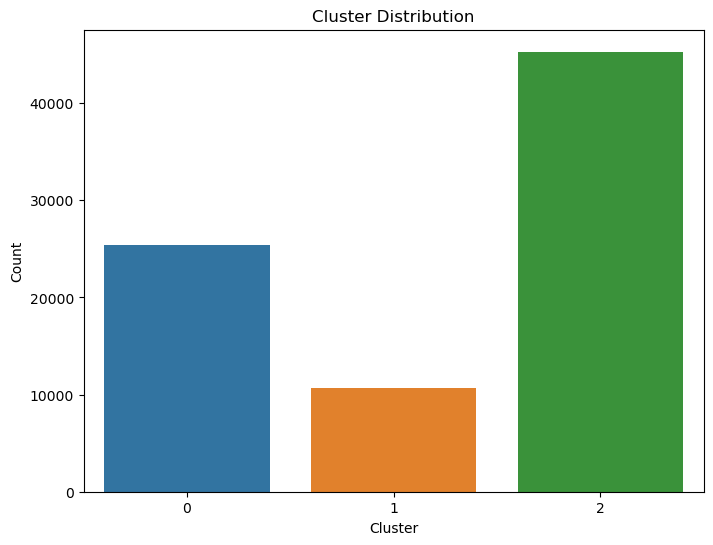

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

Metrics for Cluster 0:
Precision: 0.7933937351569944
Recall: 0.8907265209686946
F1-score: 0.8392474811751275
ROC AUC: 0.4987406504647884
Confusion Matrix:
[[4524    0]
 [ 555    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4524
           1       0.00      0.00      0.00       555

    accuracy                           0.89      5079
   macro avg       0.45      0.50      0.47      5079
weighted avg       0.79      0.89      0.84      5079





C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\anaconda3\Lib\site-packag

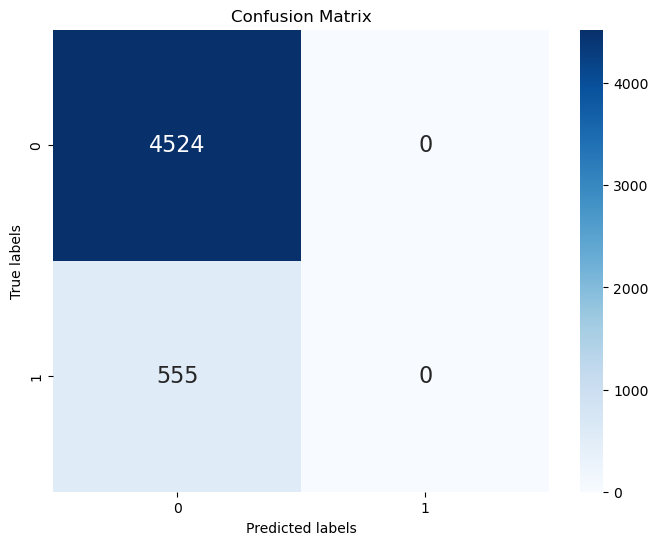

Metrics for Cluster 1:
Precision: 0.7981227721321852
Recall: 0.8933771723813997
F1-score: 0.8430679145965876
ROC AUC: 0.5147584040912185
Confusion Matrix:
[[1902    0]
 [ 227    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1902
           1       0.00      0.00      0.00       227

    accuracy                           0.89      2129
   macro avg       0.45      0.50      0.47      2129
weighted avg       0.80      0.89      0.84      2129





C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\anaconda3\Lib\site-packag

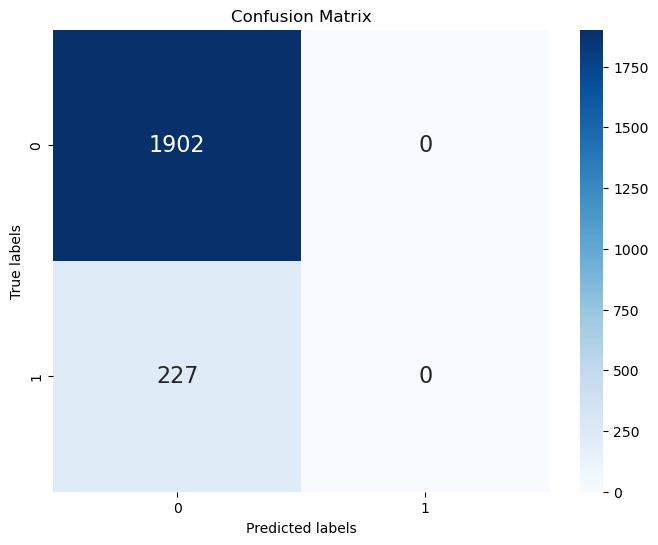

C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vivek\anaconda3\Lib\site-packag

Metrics for Cluster 2:
Precision: 0.7796472778820781
Recall: 0.8829763744756017
F1-score: 0.8281009665872259
ROC AUC: 0.49915863399812216
Confusion Matrix:
[[7998    0]
 [1060    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7998
           1       0.00      0.00      0.00      1060

    accuracy                           0.88      9058
   macro avg       0.44      0.50      0.47      9058
weighted avg       0.78      0.88      0.83      9058





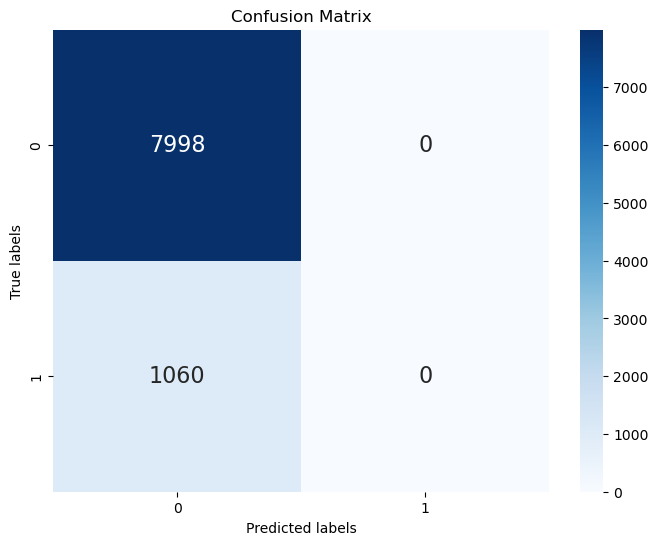

In [32]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Assuming df is your DataFrame containing the data

# Building local classifiers based on the clustering
for cluster_label in range(3):
    cluster_data = df[df['cluster'] == cluster_label]
    X_cluster = cluster_data.drop(columns=['readmitted', 'cluster'])
    y_cluster = cluster_data['readmitted']
 
    X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster,
                                                                                        test_size=0.2, random_state=42)
 
    # Train and evaluate local classifier
    local_clf = LogisticRegression(max_iter=1000)
    local_clf.fit(X_cluster_train, y_cluster_train)
    y_cluster_pred = local_clf.predict(X_cluster_test)

    # Calculate metrics for the current cluster
    conf_matrix = confusion_matrix(y_cluster_test, y_cluster_pred)
    clf_report = classification_report(y_cluster_test, y_cluster_pred)
    precision = precision_score(y_cluster_test, y_cluster_pred, average='weighted')
    recall = recall_score(y_cluster_test, y_cluster_pred, average='weighted')
    f1 = f1_score(y_cluster_test, y_cluster_pred, average='weighted')
    roc_auc = roc_auc_score(y_cluster_test, local_clf.predict_proba(X_cluster_test)[:, 1], average='weighted', multi_class='ovr')

    print(f"Metrics for Cluster {cluster_label}:")
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print('ROC AUC:', roc_auc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(clf_report)
    print("\n")
    
    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Define numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

precision:
0.8590854685924529
recall:
0.8909247417609444
f1
0.8426660121224814
roc_auc
0.6536034703812897
Confusion Matrix:
[[14458    22]
 [ 1752    32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     14480
           1       0.59      0.02      0.03      1784

    accuracy                           0.89     16264
   macro avg       0.74      0.51      0.49     16264
weighted avg       0.86      0.89      0.84     16264



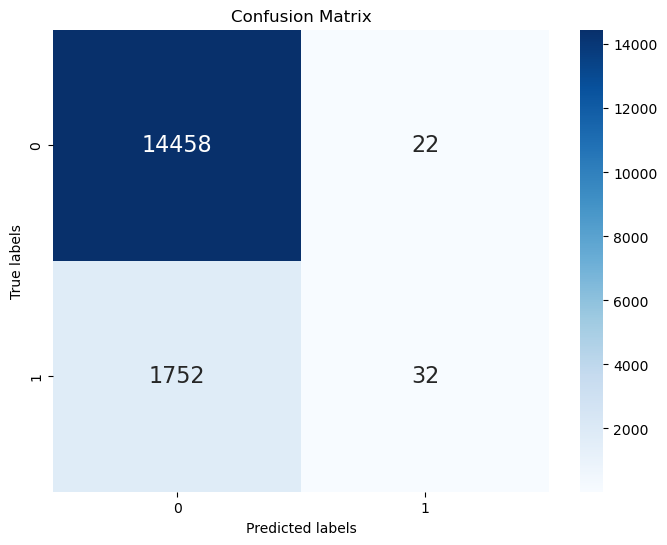

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score

# Pipeline for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], average='weighted', multi_class='ovr')

print('precision:')
print(precision)
print('recall:')
print(recall)
print('f1')
print(f1)
print('roc_auc')
print(roc_auc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(clf_report)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## UnderSampling

In [36]:
from imblearn.under_sampling import RandomUnderSampler
# Create the RandomUnderSampler object
undersampler = RandomUnderSampler(random_state=42)
 
# Resample the data
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
 
# Check the new class distribution
print("Undersampled Data Distribution:")
print(pd.Series(y_undersampled).value_counts())

Undersampled Data Distribution:
readmitted
0    9012
1    9012
Name: count, dtype: int64


In [37]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

In [38]:
from sklearn.compose import ColumnTransformer

# Pipeline for preprocessing and modeling
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

In [39]:
# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

In [40]:
# Train the model
clf.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

precision:
0.6041501083892604
recall:
0.5983356449375867
f1
0.5917884642973714
roc_auc
0.6468846648215271
Confusion Matrix:
[[1312  501]
 [ 947  845]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64      1813
           1       0.63      0.47      0.54      1792

    accuracy                           0.60      3605
   macro avg       0.60      0.60      0.59      3605
weighted avg       0.60      0.60      0.59      3605



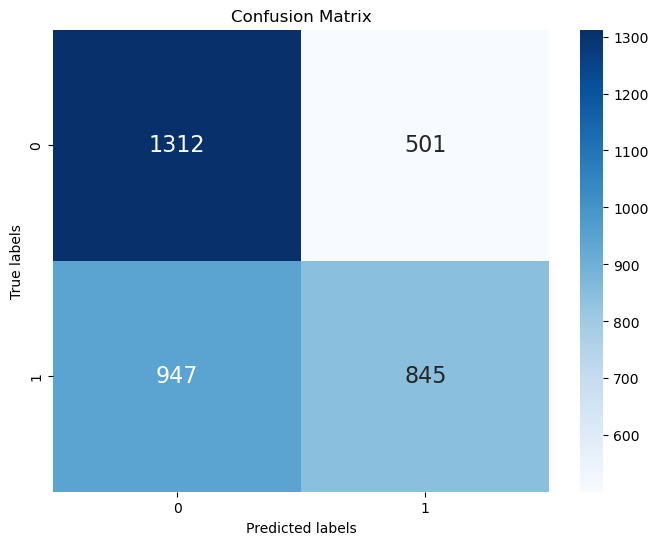

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score

# Assuming clf is your classifier model trained earlier

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1], average='weighted', multi_class='ovr')

print('precision:')
print(precision)

print('recall:')
print(recall)

print('f1')
print(f1)

print('roc_auc')
print(roc_auc)

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(clf_report)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## OverSampling

In [42]:
from imblearn.over_sampling import RandomOverSampler
# Create the RandomOverSampler object
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Check the new class distribution
print("Oversampled Data Distribution:")
print(pd.Series(y_oversampled).value_counts())


Oversampled Data Distribution:
readmitted
0    72308
1    72308
Name: count, dtype: int64


In [43]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

In [44]:
from sklearn.compose import ColumnTransformer

# Pipeline for preprocessing and modeling
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

In [45]:
# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

In [46]:
# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

precision:
0.6029428408335409
recall:
0.5977389019499377
f1
0.5922750982296896
roc_auc
0.6436840920886038
Confusion Matrix:
[[10335  4160]
 [ 7475  6954]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.71      0.64     14495
           1       0.63      0.48      0.54     14429

    accuracy                           0.60     28924
   macro avg       0.60      0.60      0.59     28924
weighted avg       0.60      0.60      0.59     28924



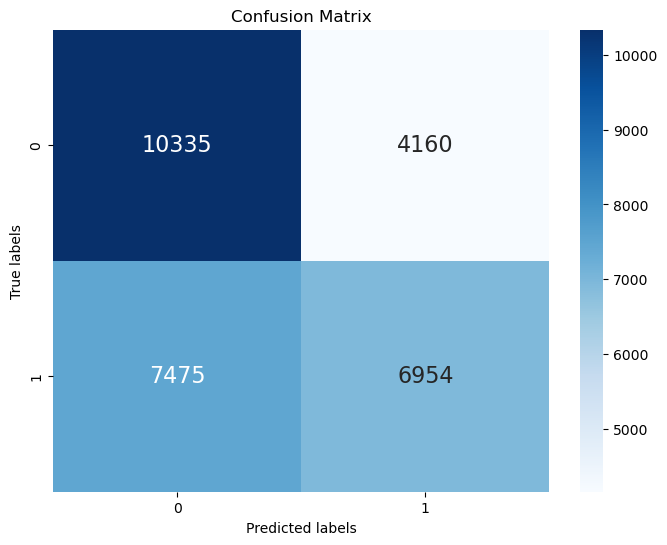

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score

# Assuming clf is your classifier model trained earlier

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1], average='weighted', multi_class='ovr')

print('precision:')
print(precision)

print('recall:')
print(recall)

print('f1')
print(f1)

print('roc_auc')
print(roc_auc)

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(clf_report)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()